In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules
import seaborn as sns  
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel('dataset_penjualan.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID transaksi  150 non-null    object
 1   beras         150 non-null    int64 
 2   telur         150 non-null    int64 
 3   tepung        150 non-null    int64 
 4   migor         150 non-null    int64 
 5   gula          150 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.2+ KB


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [49]:
df.drop(columns=['ID transaksi'], inplace=True)
df.head()

,beras,telur,tepung,migor,gula
0,1,1,0,0,0
1,1,0,1,1,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,0,0


In [50]:
missing_data = df.isnull().sum()
print('\nJumlah data yang hilang per kolom')
print(missing_data[missing_data > 0])

if df.isnull().values.any():
    print('\nAda data yang hilang')
else:
    print('\nTidak ada data yang hilang')


Jumlah data yang hilang per kolom
Series([], dtype: int64)

Tidak ada data yang hilang


menentukan pola menggunakan fp-growth

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_15260\1938541185.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


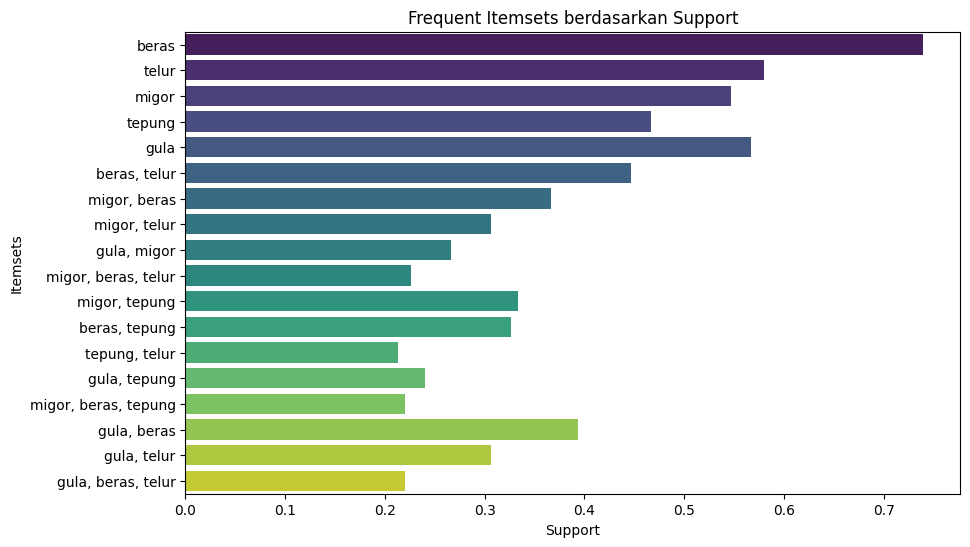

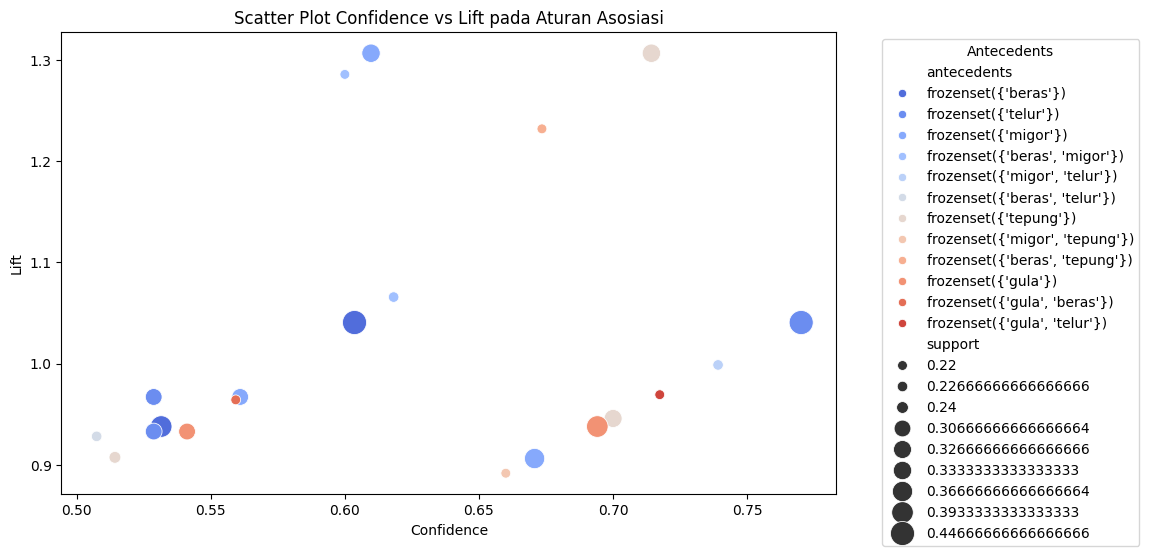

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_15260\1938541185.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


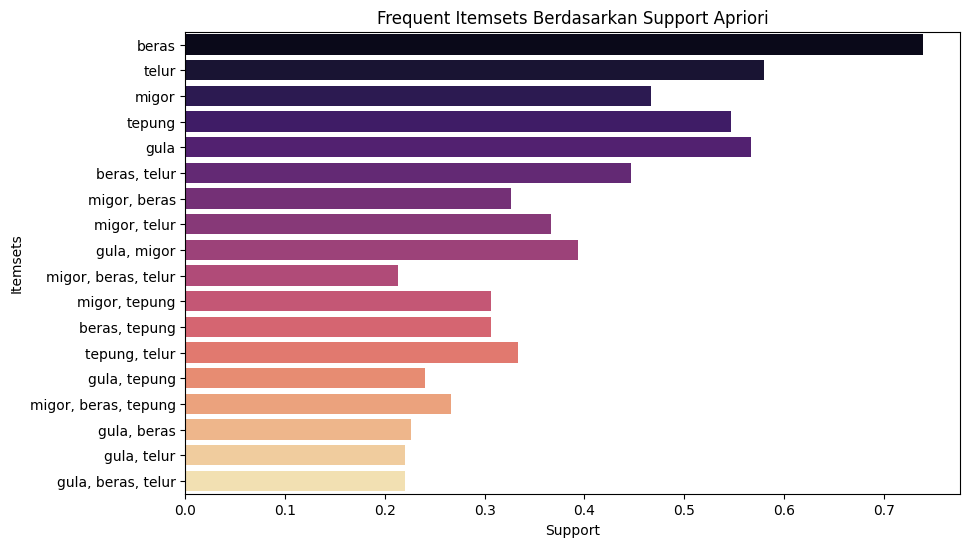

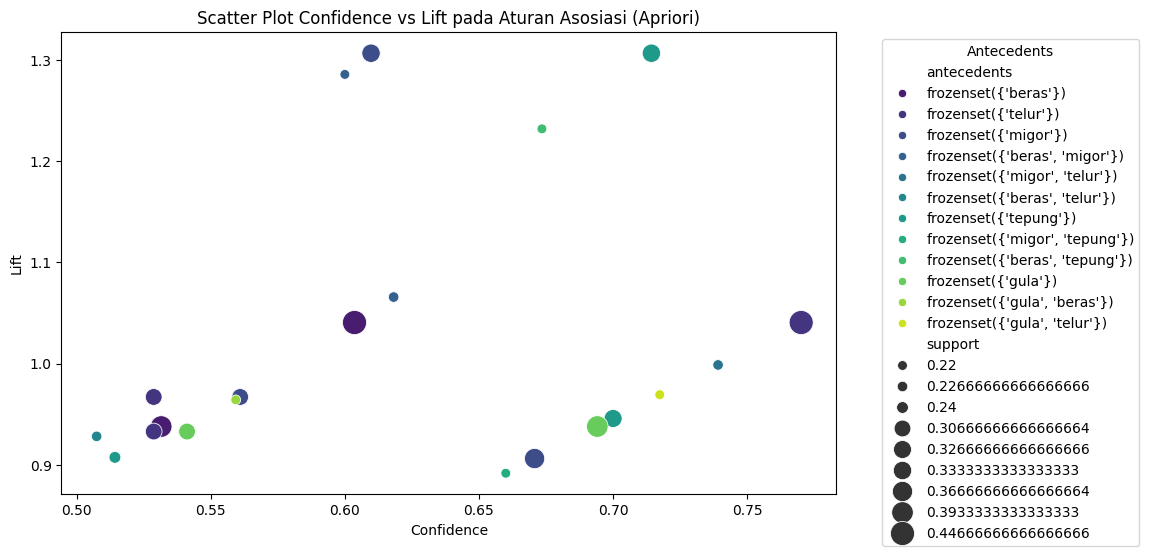

In [51]:
min_support = 0.2
frequent_itemset = fpgrowth(df, min_support=min_support, use_colnames=True)


min_confidence = 0.5
rules = association_rules(frequent_itemset, metric='confidence', min_threshold=min_confidence)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=frequent_itemset.sort_values(by='support', ascending=False),
    x='support',
    y=frequent_itemset['itemsets'].apply(lambda x: ', '.join(list(x))),
    palette='viridis'
)
plt.title('Frequent Itemsets berdasarkan Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Visualisasi Association Rules: Scatter Plot Confidence vs Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules,
    x='confidence',
    y='lift',
    size='support',
    hue='antecedents',
    palette='coolwarm',
    sizes=(50, 300),
    legend='full'
)
plt.title('Scatter Plot Confidence vs Lift pada Aturan Asosiasi')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(title='Antecedents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

frequents_items_apriori = apriori(df, min_support=min_support, use_colnames=True)


rules_apriori = association_rules(frequents_items_apriori, metric='confidence', min_threshold=min_confidence)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=frequents_items_apriori.sort_values(by='support', ascending=False),
    x='support',
    y=frequent_itemset['itemsets'].apply(lambda x: ', '.join(list(x))),
    palette='magma'
    
    
)
plt.title('Frequent Itemsets Berdasarkan Support Apriori')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Visualisasi Association Rules: Scatter Plot Confidence vs Lift
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules,
    x='confidence',
    y='lift',
    size='support',
    hue='antecedents',
    palette='viridis',
    sizes=(50, 300),
    legend='full'
)
plt.title('Scatter Plot Confidence vs Lift pada Aturan Asosiasi (Apriori)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(title='Antecedents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


implementasi itemset frequent fp-growth pada apriori

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Aturan Asosiasi dari FP-Growth:
        antecedents consequents  antecedent support  consequent support  \
0           (beras)     (telur)            0.740000            0.580000   
1           (telur)     (beras)            0.580000            0.740000   
2           (migor)     (beras)            0.546667            0.740000   
3           (migor)     (telur)            0.546667            0.580000   
4           (telur)     (migor)            0.580000            0.546667   
5    (beras, migor)     (telur)            0.366667            0.580000   
6    (migor, telur)     (beras)            0.306667            0.740000   
7    (beras, telur)     (migor)            0.446667            0.546667   
8           (migor)    (tepung)            0.546667            0.466667   
9          (tepung)     (migor)            0.466667            0.546667   
10         (tepung)     (beras)            0.466667            0.740000   
11         (tepung)      (gula)            0.466667            0.566

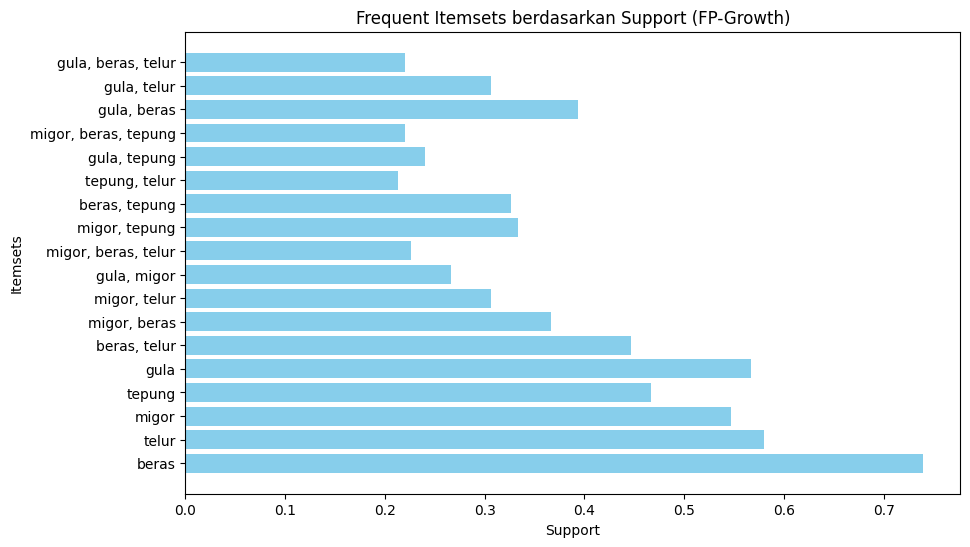

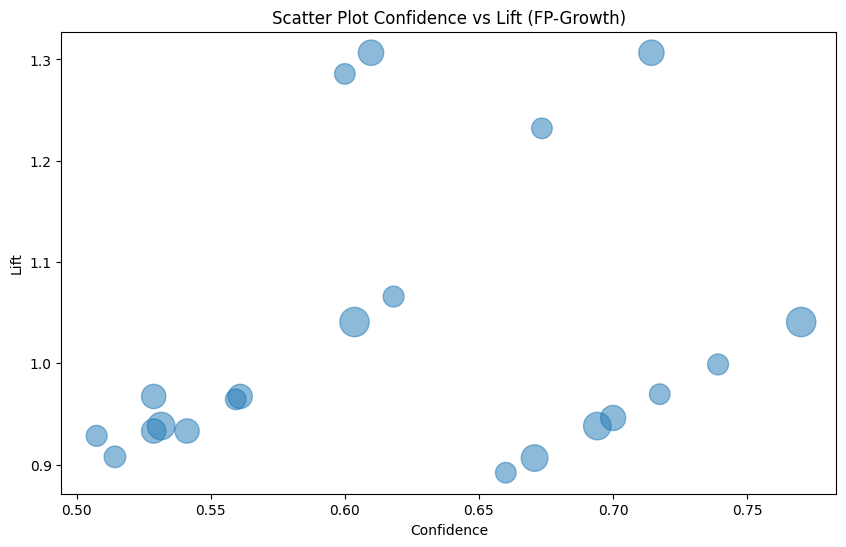

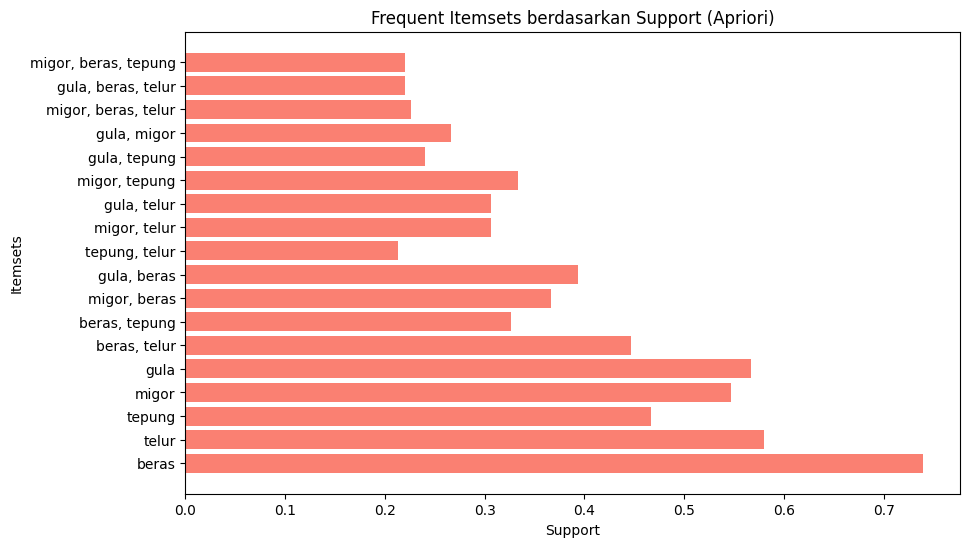

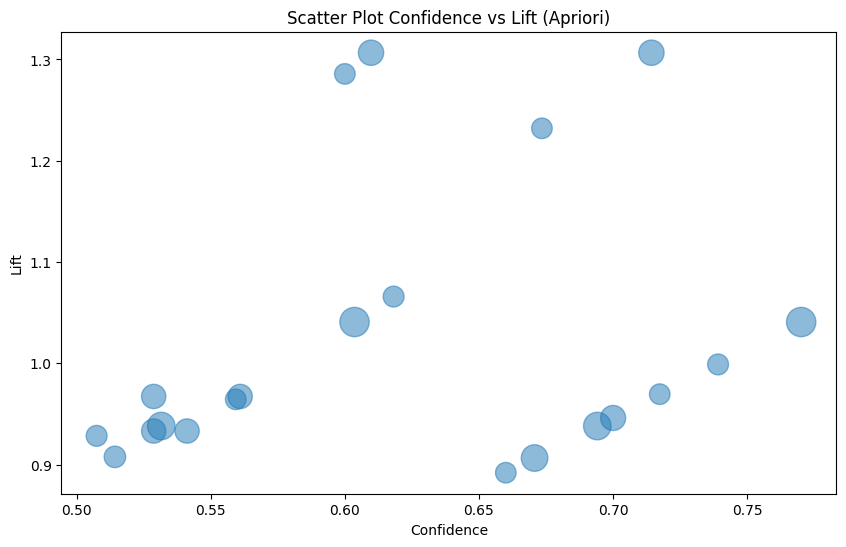

In [56]:
min_support = 0.2

# Menggunakan FP-Growth untuk menemukan itemset frekuensi tinggi
frequent_itemset_fp = fpgrowth(df, min_support=min_support, use_colnames=True)

# Menghitung aturan asosiasi dari hasil FP-Growth
rules_fp = association_rules(frequent_itemset_fp, metric='confidence', min_threshold=0.5)

# Menampilkan aturan asosiasi dari FP-Growth
print("Aturan Asosiasi dari FP-Growth:")
print(rules_fp)

# Mengambil itemset dari hasil FP-Growth
itemsets_fp = frequent_itemset_fp['itemsets'].tolist()

# Membuat DataFrame baru untuk Apriori berdasarkan itemset yang ditemukan
df_apriori = df[df.columns[df.columns.isin([item for sublist in itemsets_fp for item in sublist])]]

# Menjalankan Apriori pada DataFrame baru
frequent_itemset_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# Menghitung aturan asosiasi dari hasil Apriori
rules_apriori = association_rules(frequent_itemset_apriori, metric='confidence', min_threshold=0.5)

# Menampilkan aturan asosiasi dari Apriori
print("Aturan Asosiasi dari Apriori:")
print(rules_apriori)

# Visualisasi hasil FP-Growth
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemset_fp['itemsets'].apply(lambda x: ', '.join(list(x))), frequent_itemset_fp['support'], color='skyblue')
plt.title('Frequent Itemsets berdasarkan Support (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Visualisasi aturan asosiasi dari FP-Growth
plt.figure(figsize=(10, 6))
plt.scatter(rules_fp['confidence'], rules_fp['lift'], s=rules_fp['support']*1000, alpha=0.5)
plt.title('Scatter Plot Confidence vs Lift (FP-Growth)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

# Visualisasi hasil Apriori
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemset_apriori['itemsets'].apply(lambda x: ', '.join(list(x))), frequent_itemset_apriori['support'], color='salmon')
plt.title('Frequent Itemsets berdasarkan Support (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Visualisasi aturan asosiasi dari Apriori
plt.figure(figsize=(10, 6))
plt.scatter(rules_apriori['confidence'], rules_apriori['lift'], s=rules_apriori['support']*1000, alpha=0.5)
plt.title('Scatter Plot Confidence vs Lift (Apriori)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

1. Memuat Dataset: Dataset dimuat dari file Excel dan kolom yang tidak diperlukan dihapus.
2. FP-Growth: Algoritma FP-Growth digunakan untuk menemukan itemset frekuensi tinggi.
3. Aturan Asosiasi FP-Growth: Aturan asosiasi dihitung dari itemset yang ditemukan menggunakan metrik confidence.
4. Membuat DataFrame untuk Apriori: DataFrame baru dibuat berdasarkan itemset yang ditemukan, sehingga hanya kolom yang relevan yang digunakan.
5. Apriori: Algoritma Apriori dijalankan pada DataFrame baru untuk menemukan itemset frekuensi tinggi dan aturan asosiasi.
6. Visualisasi: Hasil dari kedua algoritma divisualisasikan dalam bentuk grafik batang dan scatter plot.